# ML Regularized Logistic Regression - Using One-vs-All

We will use an One-vs-all logistic regression to recognize hand-written digits.

The data set contains the images pixels row-wise (20x20) plus its label.
The digits are labeled from 0 through 9.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## =========== Part 1: Loading and Visualizing Data =============

In [2]:
data = pd.read_csv('ex3data1.txt', names=[str(i) for i in range(1, 402)])
print('Profiling Data')
print(data.info())
print(data.head())

Profiling Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 401 entries, 1 to 401
dtypes: float64(395), int64(6)
memory usage: 15.3 MB
None
   1    2    3    4    5    6    7    8    9   10 ...   392  393  394  395  \
0  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   396  397  398  399  400  401  
0  0.0  0.0  0.0  0.0    0    0  
1  0.0  0.0  0.0  0.0    0    0  
2  0.0  0.0  0.0  0.0    0    0  
3  0.0  0.0  0.0  0.0    0    0  
4  0.0  0.0  0.0  0.0    0    0  

[5 rows x 401 columns]


In [3]:
x = np.array(data[[str(i) for i in range(1, 401)]]) # training set
y = np.array(data['401']) # labels (0-9)
[m, n] = np.shape(x)

Text(0.5, 1.0, 'Digits examples: 0, 5, 7, 9')

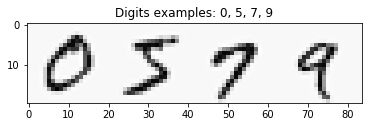

In [4]:
digitMatrix = np.column_stack([np.reshape(x[0], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[2500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[3500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[4500], [20, 20]), np.zeros([20, 1])])
plt.imshow(digitMatrix, cmap='Greys', interpolation='nearest')
plt.title("Digits examples: %s, %s, %s, %s" % (y[0], y[2500], y[3500], y[4500]))
# plt.show()

## ============ Part 2: Hypothesis Model ============

### Activation Function
We will use the sigmoid function as our activation function.

$g(z) = \frac{1}{1 + e^{-z}}$

When:

$z = 0$ then $g = 0.5$

$z \rightarrow +\infty$ then $g \rightarrow +1$

$z \rightarrow -\infty$ then $g \rightarrow 0$

In [5]:
"""
Sigmoid activation function
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Hypothesis
Function that defines our logistic model.

Definition:

$h_\theta(x) = g(\theta_0 + \theta_1 * x_1 + \theta_2 * x_2)$

Vectorial form:

$h_\theta(x) = g(\theta^{T} * x)$

where:

$g$ is the sigmoid function; $x = [x_0, x_1, x_2]$; $x_0 = 1$ and $\theta = [\theta_0, \theta_1, \theta_2]$

In [6]:
def hypothesis(X, theta):
    return sigmoid(X.dot(theta))

## ============ Part 3: Cost Function and Gradient Descent ============

### Regularized Logistic Cost Function

Computes the logistic cost of our model using theta as the parameter for logistic regression to fit the data points in X and y, considering the cost of a particular choice of theta.

For parameter $\theta_0$ we aren't computing its cost because it is the bias - doesn't have a feature.

Function cost:

$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)} log(h_\theta(x^{(i)}) - (1 - y^{(i)}) log(1 - h_\theta(x^{(i)})) ] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^{2}$

Vectorial form:

$ J(\theta) = [\frac{1}{m} * (-\vec{y}^{T} \cdot log(h_\theta(\vec{x})) - (1 - \vec{y})^{T} \cdot log(1 - h_\theta(\vec{x})))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^{2} $

If any time we got a $log(h_\theta(x^{(i)})) = 0$ that means we need to normalize the features.

In [7]:
def regularizedLogisticCostFunction(X, y, theta, lambd):
    m = len(X)
    # calculate the cost
    h = hypothesis(X, theta)
    loss = -(1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    # apply regularization
    regLoss = loss + (lambd / (2 * m) * theta[1:].T.dot(theta[1:]))
    return regLoss

In [8]:
print('Testing regularized cost function')
X_ = np.array([
    [1, 8, 1, 6],
    [1, 3, 5, 7],
    [1, 4, 9, 2]
]);
y_ = np.array([1, 0, 1]);
theta_ = np.array([-2, -1, 1, 2]);

print('J ~= 4.6832 ->', regularizedLogisticCostFunction(X_, y_, theta_, 0))
print('J ~= 8.6832 ->', regularizedLogisticCostFunction(X_, y_, theta_, 4))

Testing regularized cost function
J ~= 4.6832 -> 4.683166549810689
J ~= 8.6832 -> 8.68316654981069


### Regularized Gradient Descent
Performs gradient descent to learn $\theta$ parameters.
It return an array with $\theta$ containing the values found by taking num_iters gradient steps with learning rate $\alpha$.
Also it return an array with the history of $J(\theta)$ to be plotted.

Step to update each parameter:

$\theta_j := \theta_j - \alpha * \dfrac{\partial J}{\partial \theta_j} $

$\dfrac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} [( h_\theta(x^{(i)}) - y^{(i)}) * x^{(i)}] + \frac{\lambda}{m} \theta_j$

Vectorial form:

$\theta := \theta - \alpha * \dfrac{\partial J}{\partial \theta} $

$\dfrac{\partial J}{\partial \theta} = \frac{1}{m} X^{T} ( h_\theta(x^{(i)}) - y^{(i)}) + \frac{\lambda}{m} \theta$

In [9]:
def regularizedGradientDescent(X, y, theta, alpha, lambd, num_iters):
    m = len(X)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        # gradient
        h = hypothesis(X, theta)
        nabla = (1 / m) * X.T.dot(h - y)
        # apply regularization
        nabla_theta_0 = nabla[0]
        reg_nabla = nabla + (lambd / m * theta)
        reg_nabla[0] = nabla_theta_0
        
        # print(reg_nabla)
        # update each parameter
        theta = theta - alpha * reg_nabla
        # Save the cost J in every iteration
        J_history[i] = regularizedLogisticCostFunction(X, y, theta, lambd)
    return theta, J_history

In [10]:
# gradient w/o reg: [ 0.31722, 0.87232, 1.64812, 2.23787 ]
print(regularizedGradientDescent(X_, y_, theta_, 0, 0, 1)) # ~= [-2, -1, 1, 2], [4.6831]

# gradient w/ reg: [ 0.31722, -0.46102, 2.98146, 4.90454 ]
print(regularizedGradientDescent(X_, y_, theta_, 0, 4, 1)) # ~= [-2, -1, 1, 2], [8.6832]

(array([-2., -1.,  1.,  2.]), array([4.68316655]))
(array([-2., -1.,  1.,  2.]), array([8.68316655]))


## ============ Part 4: One-vs-All Training ============

In [11]:
def train_one_vs_all(x, y, num_labels, alpha, lambd, num_iters):
    """
    Train a logistic model for each label/digit.
    As we are recognizing digits, we will have 10 models.
    
    It returns a matrix with dimension (num_labels)x(n + 1)
    """
    [m, n] = np.shape(x)
    all_theta = np.zeros([num_labels, n + 1]) # n parameters + 1 for bias (theta_0)
    J_history = np.zeros([num_labels, num_iters])
    
    X = np.column_stack([np.ones(m), x])
    
    for k in range(num_labels):
        theta = np.zeros([n + 1])

        # pass only the class related to current k (we are training to recognize this digit)
        k_y = np.zeros([m])
        k_y[y == k] = 1
        theta, J_history[k] = regularizedGradientDescent(X, k_y, theta, alpha, lambd, num_iters)
        
        all_theta[k] = theta
    return all_theta, J_history

In [12]:
# regularization parameter
lambd = 0.1 # higher than 1 will decrease the accuracy
num_digits = 10
gc_num_iters = 50

# alpha = 1 # won't cause overshoot (and input 2500 will predict as 3) - accuracy is 88.466%
# alpha = 1.1 # won't cause overshoot (and input 2500 will predict as 3) - accuracy is 88.539%
# alpha = 1.3 # starting to cause overshoot in classifer for digit 8 - accuracy is 88.98%
# alpha = 3 # will cause some overshoot in many classes - accuracy is 88.26%
alpha = 2 # will cause less overshoot - accuracy is 89.62%

# Note: on Octave, using fmincg instead of Gradient Descent it had accurary of 95%

print('Training One-vs-All Logistic Regression...')
all_theta, J_history = train_one_vs_all(x, y, num_digits, alpha, lambd, gc_num_iters)
print('Trained')

Training One-vs-All Logistic Regression...
Trained


Plotting cost function through iterations


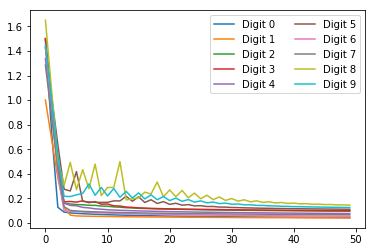

In [13]:
print('Plotting cost function through iterations')

# To plot the J(theta)
fig, ax = plt.subplots()
iterations = range(gc_num_iters)

for k in range(num_digits):
    plt.plot(iterations, J_history[k], label='Digit %d' % k)
plt.legend(loc='best', ncol=2)

## ================ Part 5: Predict for One-Vs-All ================

In [14]:
def predict_one_vs_all(all_theta, x):
    m = len(x)
    num_labels = len(all_theta)
    
    X = np.column_stack([np.ones(m), x])
    
    pk = np.zeros([m, num_labels])
    for k in range(num_labels):
        pk[:, k] = hypothesis(X, all_theta[k])
    return np.argmax(pk, axis=1)

In [15]:
pred = predict_one_vs_all(all_theta, x);
print('Predictions:', pred[0], pred[2500], pred[3500], pred[4500])
print('Training Set Accuracy:', np.mean(pred == y) * 100);

Predictions: 0 5 7 9
Training Set Accuracy: 89.62


In [16]:
def predict_and_display(x, y, all_theta, index):
    xp = x[index]
    yp = y[index]
    digitMatrix = np.column_stack([np.reshape(xp, [20, 20]), np.zeros([20, 1])])
    plt.imshow(digitMatrix, cmap='Greys', interpolation='nearest')
    pred = predict_one_vs_all(all_theta, np.array([xp]))
    plt.title("Digit %s, Predicted %s" % (yp, pred[0]))

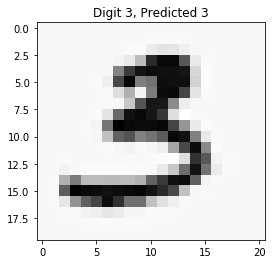

In [17]:
predict_and_display(x, y, all_theta, random.randint(0, m))